In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 800)
pd.set_option('display.max_rows', 200)

%matplotlib inline

### 1. Load and Prepare Data

In [6]:
df = pd.read_csv('../data/prepared_data.csv')

In [ ]:
df.head(n=100)

### 2. Explore Data

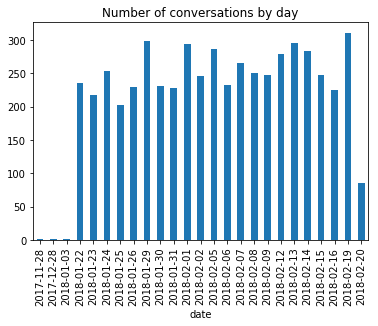

In [24]:
ax = df[['chat_id', 'date']].groupby('date').nunique().chat_id.plot(kind='bar', title='Number of conversations by day')

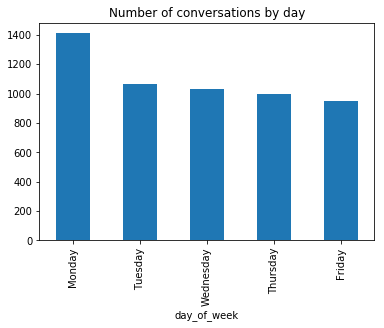

In [25]:
weekdays=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ax = df[['chat_id', 'day_of_week']].groupby('day_of_week').nunique().chat_id.plot(kind='bar', title='Number of conversations by day')
_ = ax.set_xticklabels(weekdays)

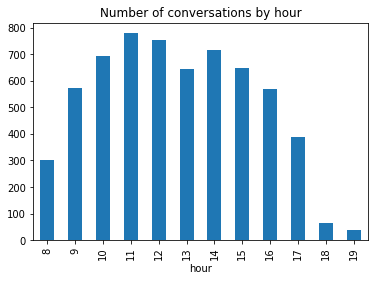

In [26]:
ax = df[['chat_id', 'hour']].groupby('hour').nunique().chat_id.plot(kind='bar', title='Number of conversations by hour')

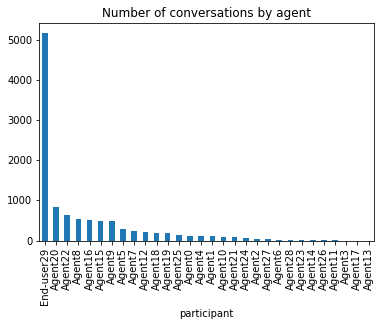

In [27]:
_ = df[['chat_id', 'participant']][df.participant != 'End-user'].groupby('participant').nunique().sort_values('chat_id', ascending=False).chat_id.plot(kind='bar', title='Number of conversations by agent')

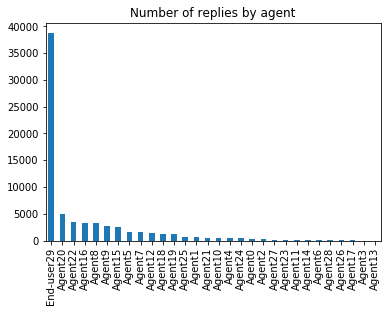

In [28]:
_ = df[df.participant != 'End-user'].participant.value_counts().plot(kind='bar', title='Number of replies by agent')

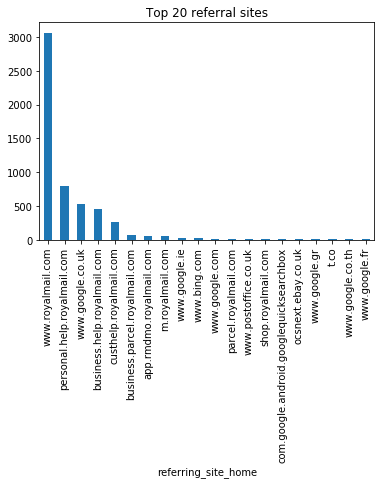

In [29]:
_ = df[['referring_site_home', 'chat_id']].groupby(['referring_site_home']).nunique().sort_values('chat_id', ascending=False).chat_id.head(n=20).plot(kind='bar', title='Top 20 referral sites')

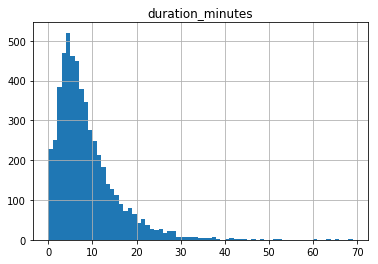

In [30]:
_ = df[['duration_minutes', 'chat_id']].groupby('chat_id').mean().hist(bins=int(df['duration_minutes'].max()))

In [31]:
print('Total chat duration for the observed period is {} hours.'.format(np.round(df[['duration_hours', 'chat_id']].groupby('chat_id').mean().sum()[0])))

Total chat duration for the observed period is 742.0 hours.


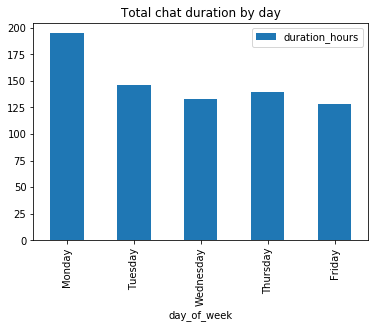

In [32]:
ax = df[['duration_hours', 'chat_id', 'day_of_week']].groupby(['day_of_week', 'chat_id']).mean().groupby('day_of_week').sum().plot(kind='bar', title='Total chat duration by day')
_ = ax.set_xticklabels(weekdays)

* check returning complainers

### 3. Estimating value from NLP and Automation

In [33]:
total_chat_duration = df[['duration_hours', 'chat_id']].groupby('chat_id').mean().sum()[0]
hours_of_work_per_month = 173.33
median_monthly_helpdesk_salary_london = 25731 / 12
savings_by_automation = np.round(total_chat_duration / hours_of_work_per_month * median_monthly_helpdesk_salary_london)
print('Estimated annual savings from automating chat: £{}'.format(int(savings_by_automation * 12)))

Estimated annual savings from automating chat: £110088


### 4. Export Data

In [34]:
df.to_csv('../data/prepared_data.csv', index=False)